# The Basics

Dimensionality reduction คือ การลดจำนวนมิติของข้อมูล

หากใช้ภาษาทางเทคนิค เราจะเรียกว่าเป็น การแปลงข้อมูลจากข้อมูลใน space ที่มีจำนวนมิติมาก (high-dimensional space) มาสู่ space ที่มีจำนวนมิติน้อย (low-dimensional space) ซึ่งเรามักจะออกแบบการลดจำนวนมิติลง โดยที่สูญเสียข้อมูลน้อยที่สุดเท่าที่ทำได้

ตัวอย่างของข้อมูลที่มีจำนวนมิติมาก


*   ข้อมูลรูปภาพ gray scale โดยที่แต่ละภาพมีจำนวน pixel เท่ากับ 1,024 x 1,024 = 1,048,576 จุด และเราใช้แต่ละ pixel เป็น feature แปลว่าในกรณีนี้ภาพ 1 ภาพ จะเป็นข้อมูล 1 จุดใน feature space ที่มี 1,048,576 มิติ (1,048,576-dimensional space)

*   ข้อมูล vdo ที่มีสี (แดง เขียว น้ำเงิน หรือ RGB) โดยเราสามารถมอง vdo เป็นรูปภาพจำนวนมากที่มาเรียงต่อกันได้ ถ้าหากแต่ละภาพใน vdo มี 1,024 x 1,024 pixels และเป็น vdo ความยาว 5 นาที ที่มี frame rate เท่ากับ 24 frame ต่อวินาที ข้อมูลของเราจะอยู่ใน space ที่มีทั้งหมด 1,024 x 1,024 x 3 x 24 x 5 x 60 มิติ หรือประมาณ 22 หมื่นล้านมิติ

*   ข้อมูลสัญญาณสมองที่เก็บมาจากเทคนิค electroencephalogram (EEG) ซึ่งมักจะมี sensor เก็บข้อมูลประมาณ 64 ตัว แต่ละตัวจะเก็บข้อมูลที่ประมาณ 1,000 จุดต่อวินาที ถ้าหากเราเก็บข้อมูลทั้งหมดเป็นเวลา 5 วินาที จะส่งผลให้ข้อมูลของเราอยู่ใน space ที่มีทั้งหมด 64 x 1,000 x 5 = 320,000 มิติ


ถ้าหากเราสามารถลดจำนวนมิติลงได้ จะส่งผลดีอยู่หลายประการ เช่น

1.   เราจะใช้ทรัพยากรการคำนวณน้อยลง เช่น ถ้าหากเราสามารถ represent ภาพ 1 ภาพ ด้วยตัวเลขแค่ 64 ตัว (แทนที่จะ represent ด้วยตัวเลข 1,048,576 ตัว) เราก็จะสามารถนำเอาโมเดลปัญญาประดิษฐ์ที่เรารู้จักมาประมวลผลได้อย่างรวดเร็วและใช้ทรัพยากรการคำนวณน้อย

2.   นอกจากนี้ หากเราลดจำนวนมิติของข้อมูลลงจนเหลือไม่เกิน 3 มิติ ก็จะช่วยให้เราสามารถนำเอาข้อมูลมา plot และดูได้ด้วยตาเปล่า

ในการลดจำนวนมิติของข้อมูล เราสามารถใช้ทั้งเทคนิคที่เป็นแบบ linear หรือ แบบ non-linear ก็ได้ โดยที่แต่ละเทคนิคก็จะมีข้อดีและข้อเสีย และมีสมมติฐานในการใช้งานที่แตกต่างกัน

---
สมมติว่าเรามีชุดข้อมูลชุดหนึ่ง ที่มีจุดข้อมูลอยู่ทั้งหมด 100 จุด แต่ละจุดข้อมูล $(x,y)$ เป็นข้อมูลใน space ที่มี 2 มิติ (ค่า $x$ เป็นมิติแรก และค่า $y$ เป็นมิติที่สอง) และในชุดข้อมูลนี้มีจุดอยู่ 2 ประเภท (2 classes)


*   class 1: $y = 1$ โดยที่ $ -4 ≤ x < 0 $
*   class 2: $y = 1$ โดยที่ $ 0 < x ≤ 4 $

ดังแสดงด้านล่าง



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors

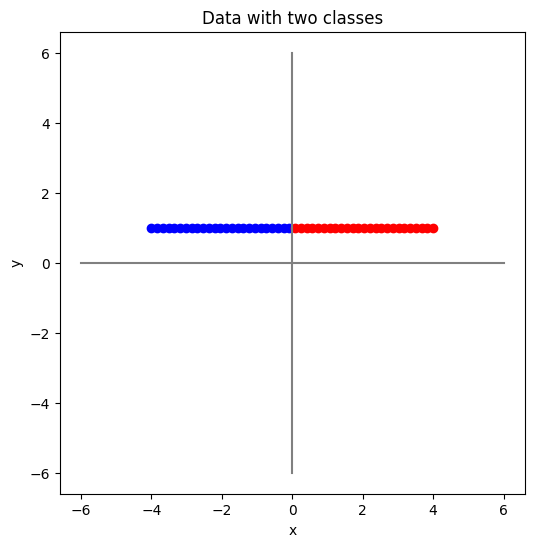

In [ ]:
num_points = 50 # # จำนวนจุดข้อมูล
x = np.linspace(-4, 4, num_points)
y = 1

# นำเอาค่า x มาใส่ใน column แรกของ data matrix และ ค่า y มาใส่ใน column ที่สอง
data = np.zeros((num_points, 2))
data[:,0] = x
data[:,1] = y

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

plt.figure(figsize=(6, 6))

# แสดงรูปข้อมูลเริ่มต้น
plt.scatter(data[data[:,0] < 0, 0], data[data[:,0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
plt.scatter(data[data[:,0] > 0, 0], data[data[:,0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
plt.plot([0, 0], y_disp, c="grey") # Plot แกน y
plt.plot(x_disp, [0, 0], c="grey") # Plot แกน x
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with two classes")
plt.show()

ถ้าหากเราต้องการแก้โจทย์ two-class classification หรือ แบ่งจุดข้อมูลที่เรามีออกเป็น 2 ประเภท (ประเภทน้ำเงิน และ ประเภทสีแดง) โดยที่เราใช้ค่า $x$ เป็น feature แรก และใช้ค่า $y$ เป็น feature ที่สอง เราสามารถใช้แกน $y$ (สมการคือ $ x=0$) แบ่งข้อมูลทั้ง 2 ประเภทออกจากกันได้เลย โดยเราจะตอบว่าจุดข้อมูลนั้นเป็น

1. class 1 (ประเภทที่ 1) ถ้าหากจุดนั้นมีค่า $x$ น้อยกว่า $0$ หรือถ้าดูจากภาพก็คือจุดนั้นอยู่ทางซ้ายของแกน $y$
2.   class 2 (ประเภทที่ 2) ถ้าหากจุดนั้นมีค่า $x$ มากกว่า $0$ หรือถ้าดูจากภาพก็คือจุดนั้นอยู่ทางขวาของแกน $y$

จะเห็นว่าเราสามารถแบ่งจุดข้อมูลสองกลุ่มนี้ได้อย่างง่ายดาย โดยการดูแค่ค่า $x$ อย่างเดียว โดยที่ไม่ต้องสนใจค่า $y$ ซึ่งแปลว่าเราจริง ๆ แล้ว เราสามารถลดข้อมูลมิติของข้อมูลจากสองมิติ ($x$ หนึ่งมิติ และ $y$ เป็นอีกมิติ) ให้เหลือแค่มิติเดียว (ค่า $x$ เพียงอย่างเดียว) ก็ยังสามารถ classify จุดเหล่านี้ได้เหมือนเดิม ดังแสดงในภาพด้านล่าง 


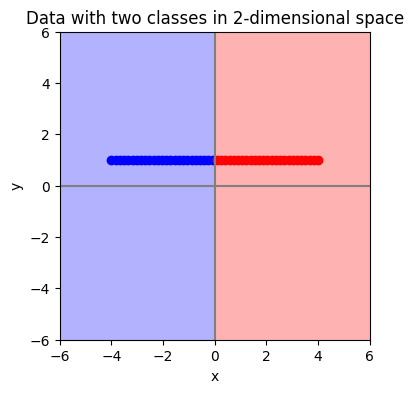

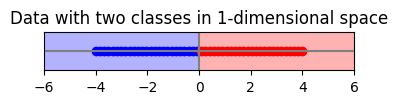

In [ ]:
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

# สร้างจุด (x,y) จำนวนมาก สำหรับเอามาใช้แสดงผล classification ที่จุดต่าง ๆ โดยใช้สีน้ำเงินแดง class 1 และสีแดงแสดง class 2
xx, yy = np.meshgrid(np.linspace(x_disp[0], x_disp[1], 100), np.linspace(y_disp[0], y_disp[1], 100))

# เก็บข้อมูลว่าแต่ละจุดถูก classify เป็น class อะไรบ้าง โดยใช้เลข 0 สำหรับ class 1 และ 1 สำหรับ class 2
labels_predicted = (xx.ravel() > 0).reshape(xx.shape)

# Plot ข้อมูลในสองมิติ
plt.figure(figsize=(4, 4))
plt.scatter(data[data[:,0] < 0, 0], data[data[:,0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1 ด้วยสีน้ำเงิน
plt.scatter(data[data[:,0] > 0, 0], data[data[:,0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2 ด้วนสีแดง
plt.plot([0, 0], y_disp, c="grey") # Plot แกน y
plt.plot(x_disp, [0, 0], c="grey") # Plot แกน x
plt.pcolormesh(xx, yy, labels_predicted, cmap=colors.ListedColormap(["blue","red"]), norm=colors.Normalize(0.0, 1.0), zorder=0, alpha=0.3) # Plot ผลจากทำนายจากข้อมูล xx และ yy
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(x_disp)
plt.ylim(y_disp)
plt.title("Data with two classes in 2-dimensional space")

# Plot ข้อมูลที่ลดมิติมาแล้ว
plt.figure(figsize=(4, 0.5))
plt.scatter(data[data[:,0] < 0, 0], np.zeros_like(data[data[:,0] < 0, 0]), c='b') # Plot จุดข้อมูลที่เป็น class 1
plt.scatter(data[data[:,0] > 0, 0], np.zeros_like(data[data[:,0] > 0, 0]), c='r') # Plot จุดข้อมูลที่เป็น class 2
plt.plot([0, 0], y_disp, c="grey") # Plot แกน y
plt.plot(x_disp, [0, 0], c="grey") # Plot แกน x
plt.pcolormesh(xx, yy, labels_predicted, cmap=colors.ListedColormap(["blue","red"]), norm=colors.Normalize(0.0, 1.0), zorder=0, alpha=0.3) # Plot ผลจากทำนายจากข้อมูล xx เพึยงอย่างเดียว
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data with two classes in 1-dimensional space")
plt.yticks([])
plt.show()

ตัวอย่างด้านบนแสดงให้เห็นว่าในบางชุดข้อมูล เราสามารถลดจำนวนมิติของข้อมูลได้ โดยที่ยังมีความสามารถในการทำ classification ได้เหมือนเดิม

---

ตัวอย่างถัดมา สมมติว่าเรามีชุดข้อมูลชุดหนึ่ง ที่มีจุดข้อมูลอยู่ทั้งหมด 100 จุด แต่ละจุดข้อมูล $(x,y)$ เป็นข้อมูลใน space ที่มี 2 มิติ (ค่า $x$ เป็นมิติแรก และค่า $y$ เป็นมิติที่สอง) และในชุดข้อมูลนี้มีจุดอยู่ 2 ประเภท (2 classes)


*   class 1: $y = x$ โดยที่ $ -4 ≤ x < 0 $
*   class 2: $y = x$ โดยที่ $ 0 < x ≤ 4 $

ดังแสดงด้านล่าง

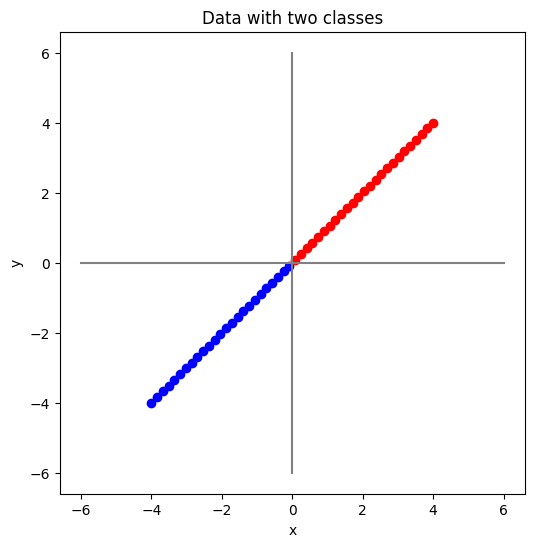

In [ ]:
num_points = 50
x = np.linspace(-4, 4, num_points)
y = x
data = np.zeros((num_points, 2))
data[:,0] = x
data[:,1] = y

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

plt.figure(figsize=(6, 6))

# แสดงรูปข้อมูลเริ่มต้น
plt.scatter(data[data[:,0] < 0, 0], data[data[:,0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
plt.scatter(data[data[:,0] > 0, 0], data[data[:,0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
plt.plot([0, 0], y_disp, c="grey") # Plot แกน y
plt.plot(x_disp, [0, 0], c="grey") # Plot แกน x
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with two classes")
plt.show()

จะเห็นว่าถ้าเรานำเอาข้อมูลด้านบนมาหมุนตามเข็มนาฬิกาไป $45$ องศา เราจะสามารถแปลงโจทย์ข้อนี้ให้กลายเป็นโจทย์ที่มีหน้าตาคล้ายกับข้อมูลในตัวอย่างก่อนหน้า

การหมุนจุดข้อมูลทวนเข็มนาฬิกาไป $\theta$ องศา เราสามารถอธิบายด้วย rotation matrix

$$
  R(θ) = 
  \begin{bmatrix}
      cos θ        & -sin θ  \\
      sin θ       & cos θ \\
  \end{bmatrix}
$$

หากเรา represent พิกัด $(x,y)$ ด้วย vector 

$$
  \begin{bmatrix}
      x \\
      y\\
  \end{bmatrix} 
$$

เราจะสามารถหมุนจุดข้อมูลนั้นตามเข็มนาฬิกา 45 องศา ด้วยการใช้ $R(-45°)$



$$
   \begin{bmatrix}
      x' \\
      y'\\
  \end{bmatrix} = 
  R(-45°)  \begin{bmatrix}
      x \\
      y\\
  \end{bmatrix}
$$

เกิดเป็นพิกัด $(x',y')$

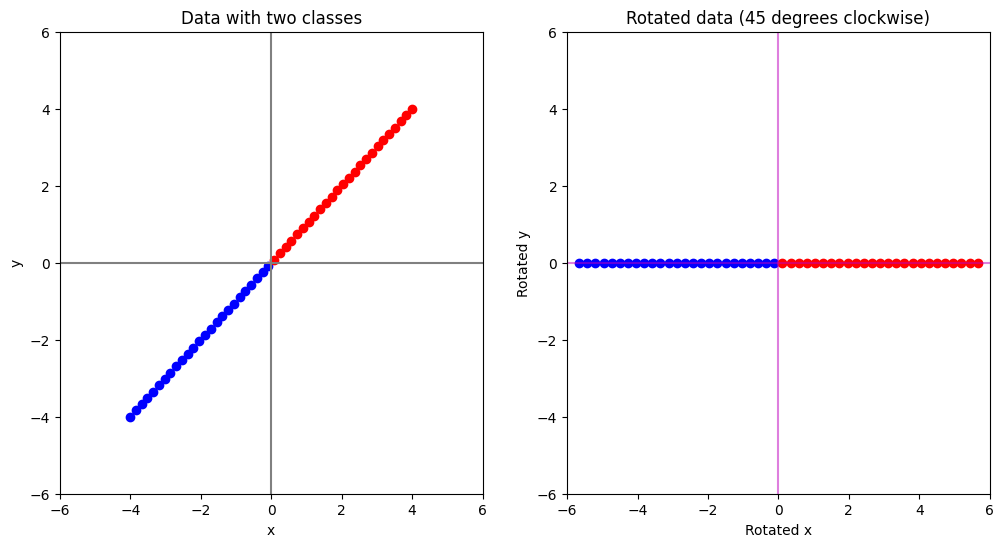

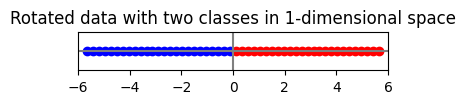

In [ ]:
def rotate_counterclockwise(data, degree):

  # สร้าง rotation matrix R ที่ทำหน้าที่ใช้หมุนพิกัดตามเข็มนาฬิกา
  R = np.array([[np.cos(degree), -np.sin(degree)],
                [np.sin(degree), np.cos(degree)]])
  
  return np.transpose(np.matmul(R, np.transpose(data)))

# ใช้ rotation matrix คำนวณพิกัดใหม่ของจุดทั้งหมด
data_rot45 = rotate_counterclockwise(data, -np.pi/4)

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[data[:,0] < 0, 0], data[data[:,0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
ax[0].scatter(data[data[:,0] > 0, 0], data[data[:,0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel="x", ylabel="y")
ax[0].set_title("Data with two classes")


# แสดงรูปหลังหมุนข้อมูลตามเข็มนาฬิกาไป 45 องศา
ax[1].scatter(data_rot45[data[:,0] < 0, 0], data_rot45[data[:,0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
ax[1].scatter(data_rot45[data[:,0] > 0, 0], data_rot45[data[:,0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
ax[1].plot([0, 0], y_disp, c="m", alpha=0.5) # Plot แกน y ที่ถูกหมุน
ax[1].plot(x_disp, [0, 0], c="m", alpha=0.5) # Plot แกน x ที่ถูกหมุน
ax[1].set(xlabel="Rotated x", ylabel="Rotated y")
ax[1].set_title("Rotated data (45 degrees clockwise)")

plt.setp(ax, xlim=x_disp, ylim=y_disp)

# Plot ข้อมูลที่ลดมิติมาแล้ว
plt.figure(figsize=(4, 0.5))
plt.scatter(data_rot45[data[:,0] < 0, 0], np.zeros_like(data_rot45[data[:,0] < 0, 0]), c='b') # Plot จุดข้อมูลที่เป็น class 1
plt.scatter(data_rot45[data[:,0] > 0, 0], np.zeros_like(data_rot45[data[:,0] > 0, 0]), c='r') # Plot จุดข้อมูลที่เป็น class 2
plt.plot([0, 0], y_disp, c="grey") # Plot แกน y
plt.plot(x_disp, [0, 0], c="grey") # Plot แกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Rotated data with two classes in 1-dimensional space")
plt.yticks([])
plt.show()


plt.show()

มีข้อสังเกตดังนี้


*   ข้อมูลเริ่มต้นอยู่ใน space ขนาด 2 มิติ โดยมีลักษณะเป็นเส้นตรงที่ทำมุม 45 องศากับแกน $x$

*   ถ้าหากเราหมุนจุดข้อมูลเหล่านั้นตามเข็มนาฬิกาไป 45 องศา เราจะเห็นข้อมูลจัดเรียงกันอยู่บนแกน $x$ โดยที่ค่าใน แกน $y$ ทุกตัวเป็น 0

* ถ้าหากเราต้องการจะ classify ข้อมูลนี้ เราสามารถทำได้โดยที่แค่ค่าในแกน $x$ (ไม่ต้องดูแกน $y$ เลย) แสดงว่าเราสามารถลดจำนวนมิติของข้อมูลให้เหลือ $1$ มิติได้ โดยที่ยังมีความสามารถในการทำ classification ได้เหมือนเดิม
 
---

จากตัวอย่างทั้งหมดใน part นี้ จะเห็นได้ว่าในหลาย ๆ ครั้ง เราสามารถลดจำนวนมิติได้  ซึ่งในตัวอย่างเหล่านี้เราแค่ใช้การ transform จุดข้อมูลอย่างง่าย เช่น การหมุน ก็ส่งผลให้ข้อมูลมาอยู่ในรูปแบบที่เราสามารถกำจัดแกน $y$ ได้เลย ส่งผลให้จำนวนมิติลดลงจาก $2$ มิติ ไปเป็น $1$ มิติ
และเรายังพบว่าเราสามารถนำเอาข้อมูลใน $1$ มิตินี้ไปใช้งานต่อได้ เช่น เรายังสามารถนำเอาไปใช้เป็น feature ในการ classify ได้เหมือนเดิม

**หมายเหตุ** ในตัวอย่างล่าสุด เราหมุนจุดข้อมูลไป $45$ องศาแบบตามเข็มนาฬิกา โดยที่ไม่ขยับแกน $x$ และ แกน $y$ เลย ซึ่งการทำแบบนี้ ในอีกมุมมองนึง ก็เหมือนกับการหมุนแกน $x$ และ แกน $y$ ไป $45$ องศาแบบทวนเข็มนาฬิกา โดยที่ไม่ขยับจุดข้อมูลได้เช่นกัน

---
ในสถานการณ์การทำงานจริง เรามักเจอข้อมูลที่มีความซับซ้อนมาก เช่น ข้อมูลที่อยู่ใน space ที่มีจำนวนมิติสูงมาก เราอาจจะไม่สามารถใช้การ transform แบบง่าย ๆ ที่เราใช้ในตัวอย่างนี้ จึงมีเทคนิคมากมายถูกคิดค้นขึ้นเพื่อใช้ช่วยลดมิติของข้อมูลได้อย่างมีหลักการ